# 로지스틱 회귀
## 로지스틱 회귀, 다중 분류, 시그모이드 함수, 소프트맥스 함수
로지스틱 회귀 알고리즘을 배우고 이진 분류 문제에서 클래스 확률을 예측한다.

✨한빛 럭키백 이벤트 개최!! 

구성품을 모른 채 먼저 구매하고, 배송받은 다음에야 비로소 구성품을 알 수 있는 상품 - 럭키백의 물품은 생선으로 한정

럭키 이벤트 소식을 들은 고객 만족팀은 강하게 반대하는데,, 알지도 못하는 제품은 팔 수 없다!!

마케팅팀은 럭키백에 포함된 생선의 확률을 알려주는 방향으로 이벤트 수정안을 내놓았다. 

어떻게 생선의 확률을 구할까? 머신러닝으로 럭키백의 생선이 어떤 타깃에 속하는지 확률을 구할 수 있을까?

## 럭키백의 확률
- 럭키백에 들어갈 수 있는 생선은 7개
- 럭키백에 들어간 생선의 크기, 무게 등이 주어졌을 때 7개 생선에 대한 확률을 출력해야 한다. 
- 길이, 높이, 두께, 대각선 길이, 무게를 사용할 수 있다. 

확률은 숫자니까 회귀 문제인가? 7개의 생선에 대한 문제라면 분류 아닐까? 

### KNN 분류기로 럭키백에 들어간 생선의 확률 계산하기
KNN은 주변 이웃을 찾아주기 때문에 이웃의 클래스 비율을 확률이라고 출력하면 되지 않을까?
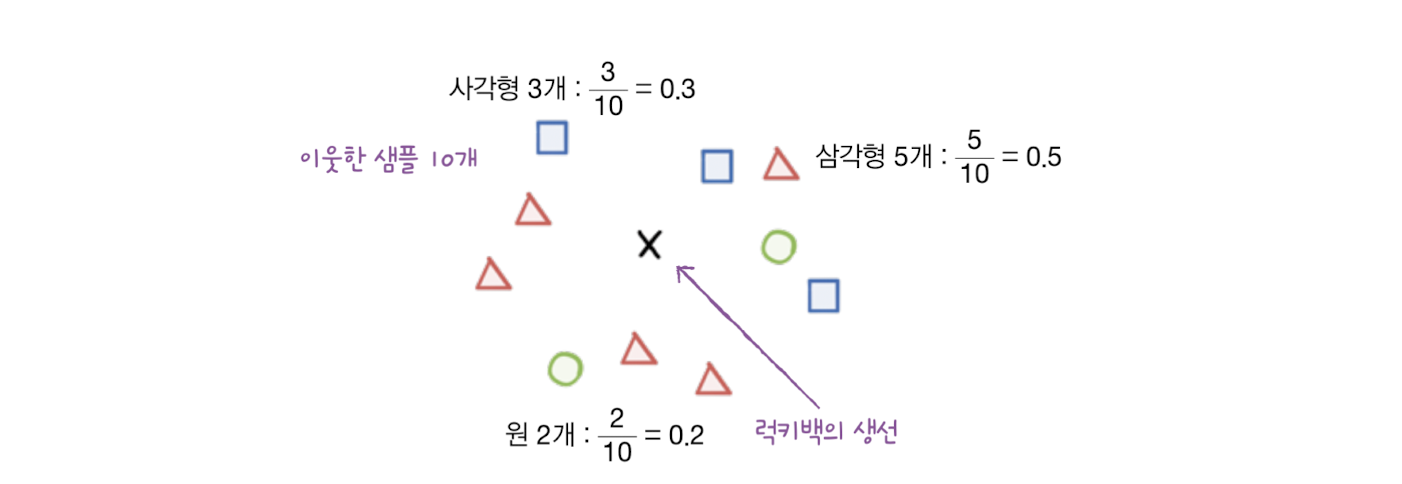

In [1]:
# 데이터 준비하기
import pandas as pd 
fish = pd.read_csv('http://bit.ly/fish_csv_data')

fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# species 열에서 고유한 값 추출
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


📍이 데이터프레임에서 species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용한다. 

➡️ 데이터프레임에서 열 선택 : 원하는 열을 리스트로 나열하기

In [3]:
# Species 열을 빼고 나머지 5개 열을 선택해보기 : 원하는 열을 리스트로 나열
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [4]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [5]:
# 각각 weight, length, diagonal, height, width의 값
# fish_input에 5개의 특성이 잘 저장되어 있는지 확인
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
# 타깃 데이터 추출
# 타깃은 1차원 배열이기 때문에, 2차원 배열로 만들면 안된다.
fish_target = fish['Species'].to_numpy()

In [7]:
# fish_target에는 species열의 값들이 들어있다.
fish_target 

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [8]:
# 훈련 데이터 검증 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [9]:
# 훈련 세트와 테스트 세트를 표준화 전처리
# 훈련 세트의 통계 값으로 테스트 세트를 변환해야 한다. 

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
# KNN 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


데이터프레임에 7개의 생선이 있었는데, 타깃 데이터를 만들 때, `fish['Species']`사용해 만들었기 때문에 훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있다. 

### 다중 분류 (Multiclass classification)
타깃 데이터에 2개 이상의 클래스가 포함된 문제를 다중분류라고 한다.

이진 분류와 모델을 만들고 훈련하는 방식은 다중분류도 동일하다. 

이진 분류를 사용했을 때는 양성 클래스와 음성 클래스를 각각 1과 0으로 지정하여 타깃 데이터를 만들었다. 다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수는 있지만 사이킷런에서는 편리하게 문자열로 된 타깃값을 그대로 이용할 수 있다. 

📍 주의할 점

    타깃값을 그대로 사이킷런 모델에 전달하면 자동으로 알파벳 순으로 매겨진다. 그래서 pd.unique(fish['Species'])로 출력했던 순서와 다르다. 
    KNeighborsClassifier에서 정렬된 타깃값은 classes_에 저장되어 있다. 

In [11]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


Bream이 첫 번째 클래스, Parkki가 두 번째 클래스

predict()는 타깃값으로 예측을 출력한다.

In [12]:
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [13]:
# 테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측해보기
print(kn.predict(test_scaled[:5])) 

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


### predict_proba()
클래스별 확률값을 반환한다.
### round()
기본으로 소수점 첫째 자리에서 반올림을 하는데, decimals매개변수로 유지할 소수점 자리수를 지정할 수 있다.

In [14]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


predict_proba()의 출력 순서는 classes_속성과 같다. 즉 첫 번째 열이 Bream에 대한 호가률, 두 번째 열이 Parkki에 대한 확률이다. 
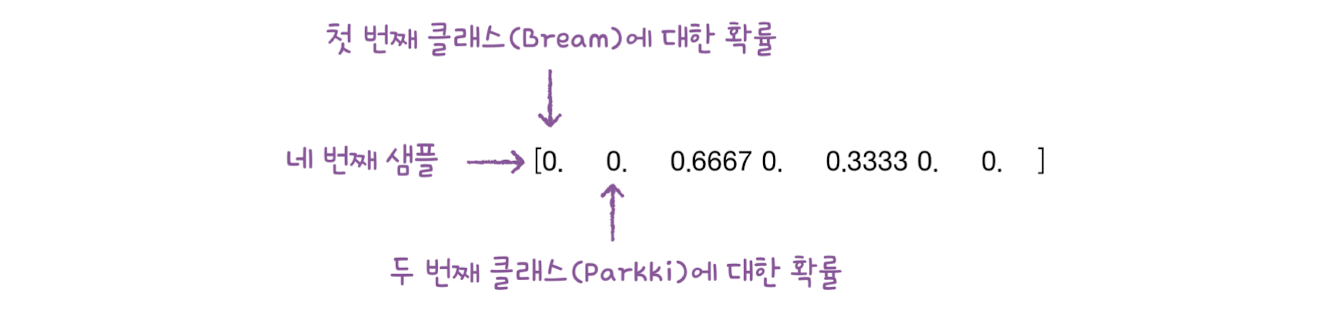

이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 위해 네 번째 샘플의 최근접 이웃의 클래스를 확인! 

📍 kneighbors() 메서드의 입력은 2차원 배열이어야 한다. 이를 위해 넘파이 배열의 슬라이싱 연산자를 사용하면 된다. 

✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨

슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어진다!!!

In [15]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


이 샘플의 이웃은 다섯번째 클래스인 Roach가 1개이고, 세 번째 클래스인 Perch가 두개이다. 

- 다섯 번째 클래스에 대한 확률은 1/3
- 세 번째 클래스에 대한 확률은 2/3 

앞서 출력한 네 번째 샘플의 클래스 확률과 같다

💡 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3, 1/3, 2/3, 3/3이 전부인데, 럭키백의 확률을 이렇게만 표시하면 조금 애매한데?

## 로지스틱 회귀
이름은 회귀이지만 분류 모델 ; 선형 방정식을 사용한 분류 알고리즘

선형 회귀와 달리 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력할 수 있다.

선형 회귀와 동일하게 선형 방정식을 학습한다. 
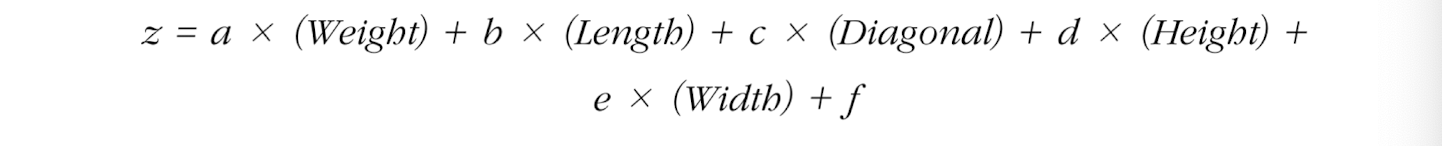

a, b, c, d, e는 가중치 혹은 계수이다. 특성은 늘어났지만 다중 회귀를 위한 선형 방정식과 동일한다. 

z는 어떤 값도 가능한데, 확률이 되려면 0~1(0% ~ 100%) 사이 값이 되어야 한다.

z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 바꾸기 위해서 시그모이드 함수(sigmoid function - 로지스틱 함수(logistic function)을 사용한다.
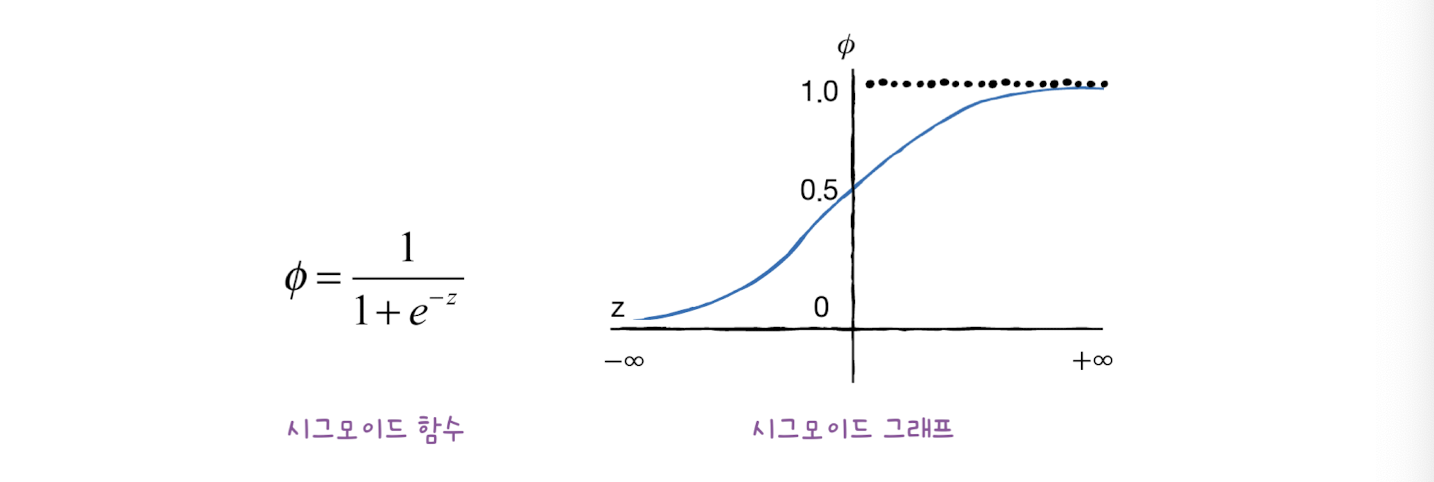
- z가 무한하게 큰 음수 : 0에 가까워진다
- z가 무한하게 큰 양수 : 1에 가까워진다
- z = 0 : 0.5

➡️ 0~1 범위로 한정이 되기 때문에 확률로 해석할 수 있다! 

넘파이를 사용해 -5와 5 사이에 0.1 간격으로 z를 만든 다음 z위치마다 시그모이드 함수를 계산한다. 
### np.exp()
지수 함수 계산 함수

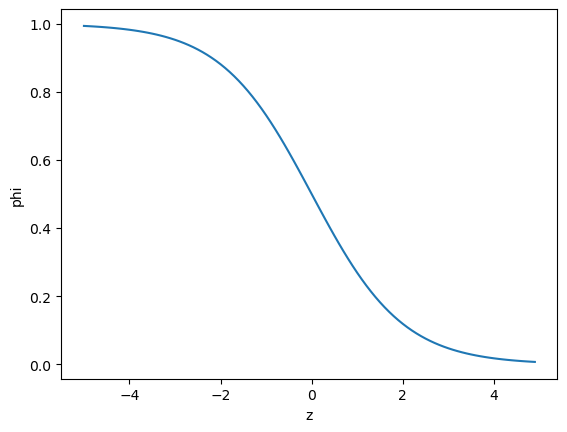

In [16]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

시그모이드 함수의 출력
-0.5보다 크면 : 양성 클래스
- 0.5보다 작으면 : 음성 클래스

사이킷런의 경우, 0.5이면 음성 클래스로 판단한다. (라이브러리마다 다를 수 있다.)

### 로지스틱 회귀로 이진 분류 수행하기

넘파이 배열은 불리언 인덱싱을 통해 True, False값을 전달하여 행을 선택할 수 있다. 

In [17]:
# 불리언 인덱싱
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False,True, False, False]])

['A' 'C']


In [18]:
# Bream과 Smelt행만 골라내기
# 도미와 빙어일 경우 True, 그 이외는 모두 False
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [19]:
# 이 데이터로 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [20]:
# train_bream_smelt에 있는 처음 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


두 번째 샘플을 제외하고는 모두 도미로 예측

In [21]:
# predict_proba()로 처음 5개 샘플의 예측 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


샘플마다 두개의 확률이 출력 
- 첫 번째 열이 음성 클래스(0)에 대한 확률
- 두 번째 열이 양성 클래스(1)에 대한 확률

둘 중에 어떤 것이 양성 클래스인지 확인하기 위해서는?

📍사이킷런은 타깃값을 알파벳순으로 정렬하여 사용 : classes_속성으로 확인

In [22]:
print(lr.classes_)

['Bream' 'Smelt']


In [23]:
# 로지스틱 회귀가 학습한 계수 확인하기
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


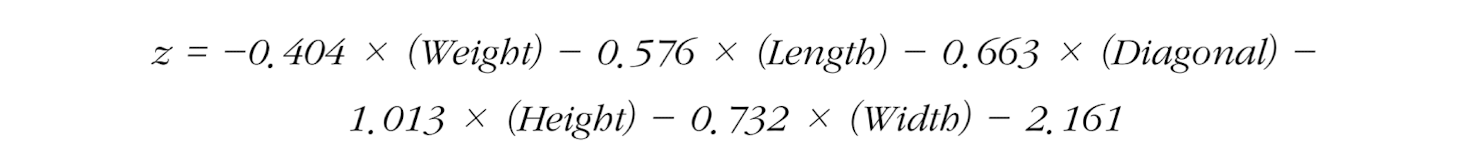
선형회귀와 굉장히 비슷한 것을 확인할 수 있다. 

### decision_function()
LogisticRegression모델로 z값을 계산하는 함수

In [24]:
# train_bream_smelt의 처음 5개 샘플의 값 z값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


### expit()
파이썬의 사이파이 라이브러리에 있는 시그모이드 함수

선형 방정식의 출력을 0과 1 사이의 값으로 압축해 이진 분류를 위해 사용

np.exp()로 분수 계산을 하는 것보다 훨씬 편리하고 안전하다

In [25]:
# 이 값을 시그모이드 함수에 통과시켜 확률 얻기
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


출력값을 보면 predict() 메서드 출력의 두 번째 열의 값과 동일함을 알 수 있다

In [26]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


decision_function()메서드는 양성 클래스에 대한 z값을 반환한다

### 로지스틱 회귀로 다중 분류 수행하기
다중 분류도 이준 분류와 크게 다르지 않다

LogisticRegression 클래스
1. 기본적으로 반복적인 알고리즘을 사용한다. max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100이다. 여기에 준비한 데이터셋을 사용해 모델을 훈련하면 반복 횟수가 부족하다는 경고가 발생한다. 

📍충분히 훈련시키기 위해 반복 횟수를 1000으로 늘린다. 

2. 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제한다. (L2규제) 릿지 회귀에서는 alpha  매개변수로 규제의 양을 조절했다. 

    - alpha값이 커지면 규제도 커졌다. 
    - LigisticRegression에서 규제를 제어하는 매개변수 : C(기본값1)
    - C는 alpha와 반대로 작을수록 규제가 커진다. 

In [27]:
# LogisticRegression클래스로 다중 분류 모델 훈련
# 7개의 생선 데이터가 모두 들어있는 train_scale, train_target 사용

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


훈련 세트와 테스트 세트에 대한 점수가 높고 과대적합이나 과소적합으로 치우치지 않았다. 

In [28]:
# 테스트 세트의 처음 5개 샘플에 대한 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [29]:
# 예측 확률 출력
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


5개 샘플에 대한 예측이므로 5개의 행이 출력

7개의 생선에 대한 확률 계산했으니 7개의 열이 출력

이진 분류인 경우는 2개의 열만 있었다.| 

In [30]:
# 어떤 값에 해당하는지 classes_로 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


첫 번째 샘플은 prech를 가장 높은 확률로 예측했다. 다중 분류는 샘플마다 클래스 개수만큼 확률을 출력한다. 가장 높은 확률이 예측 클래스가 된다. 

📍다중 분류일 경우 선형 방정식을 알기 위해 coef_, intercept_출력

In [31]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


1. coef_ 의 column : 5개 - 5개의 특성(feature)을 이용하기 때문
2. coef_의 row, intercept_의 row : 7개 

    - 다중 분류는 클래스마다 z값을 하나씩 계산한다. 
    - 가장 높은 z값을 출력하는 클래스가 예측 클래스
3. 확률 계산 : 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 변환했지만, 다중 분류는 소프트맥스(softmax)함수를 사용하여 7개의 z값을 확률로 변환한다.

### softmax()
여러 개의 선형 방정식의 출력값을 0 ~ 1 사이로 압축하고 전체 합이 1이 되도록 만드는 함수

- axis = 1 : 각 행, 각 샘플에 대해 소프트맥스를 계산

    - 만약 axis 매개변수 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산한다. 

지수 함수를 사용하기 때문에 정규화된 지수 함수라고도 부른다.
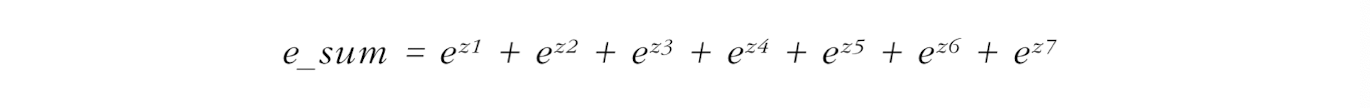
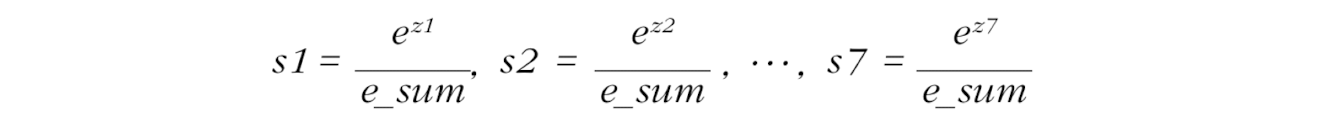

s1에서 s7까지 모두 더하면 분자와 분모가 같아지므로 1이된다. 7개 생선에 대한 확률의 합이 1이 되어야 하는데 적절하다! 

📌 시그모이드, 소프트맥스 함수는 알면 신경망을 배울 때 훨씬 잘 이해할 수 있다.

In [32]:
# decision_function()으로 z1~z7 구하기
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [33]:
# softmax함수 
from scipy.special import softmax
proba = softmax(decisions, axis=1) 
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


1. KNN : 확률을 출력할 수 있지만, 이웃한 샘플의 클래스 비율이므로 항상 정해진 확률만을 출력
2. Logistic Regression : 클래스 개수만큼 방정식을 훈련해 방정식의 출력값을 소프트맥스 함수를 통과시키면 각 클래스에 대한 확률로 이해할 수 있다

## 핵심 패키지와 함수
### Logistic Regression
- sag : 확률적 경사 하강법 알고리즘으로 특성과 샘플의 수가 많을 때 성능이 빠르고 좋다
- penalty : L2규제(릿지 방식), L1규제(라쏘 방식)을 선택할 수 있다. 

    - 기본 규제는 L2규제를 의마한 l1
    
- C : 규제의 강도 제어 

    - 기본값은 1.0 이며 값이 작을수록 규제가 강해진다.
    - alpha값은 값이 클수록 규제가 강해진다.
    
- predict_proba() : 예측 확률 반환

    - 이진 분류의 경우 : 음성 클래스와 양성 클래스에 대한 확률 반환
    - 다중 분류의 경우 : 샘플마다 모든 클래스에 대한 확률을 반환
    
- decision_function() : 모델이 학습한 선형 방정식의 출력을 반환 

    - 이진 분류의 경우 : 양성 클래스의 확률이 반환
    
        - 이 값이 0보다 크면 양성
        - 이 값이 0보다 작거나 같으면 음성
        
    - 다중 분류일 경우 : 각 클래스마다 선형 방정식을 계산
    
        - 가장 큰 값의 클래스가 예측 클래스